# Jupyter notebook sample

In [31]:
# Import libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


### Obtaining Data
[O, S]
The dataset that was used was obtained from Kaggle. The dataset was already cleaned and stuctured.


OSEMN Model

O - Obtaining our data

S - Scrubbing/Cleaning our data

E - Exploring/Visualizing our data will allow us to find patterns and trends

M - Modeling our data will give us our predictive power as a wizard

N - Interpreting our data

In [32]:
df = pd.read_csv('diabetes.csv')

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [34]:
df['Outcome'] = df['Outcome'].astype('category')

#### Missing Values

There are no missinf records

### Visualizations

Create graphs and visualizations that match your chosen color scheme.

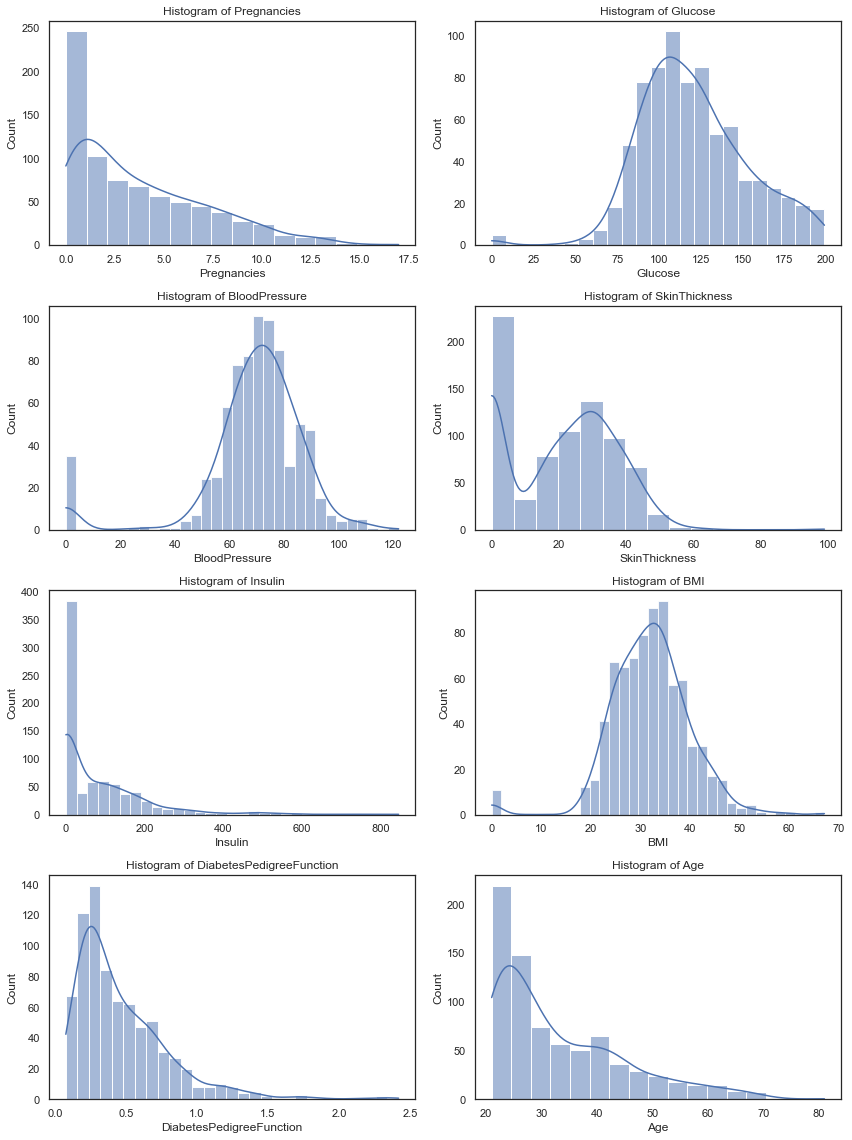

In [35]:
# Plot histograms
sns.set(style="white")
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

for ax, column in zip(axes.flatten(), df.columns):
    sns.histplot(data=df, x=column, ax=ax, kde=True)
    ax.set_title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

In [36]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


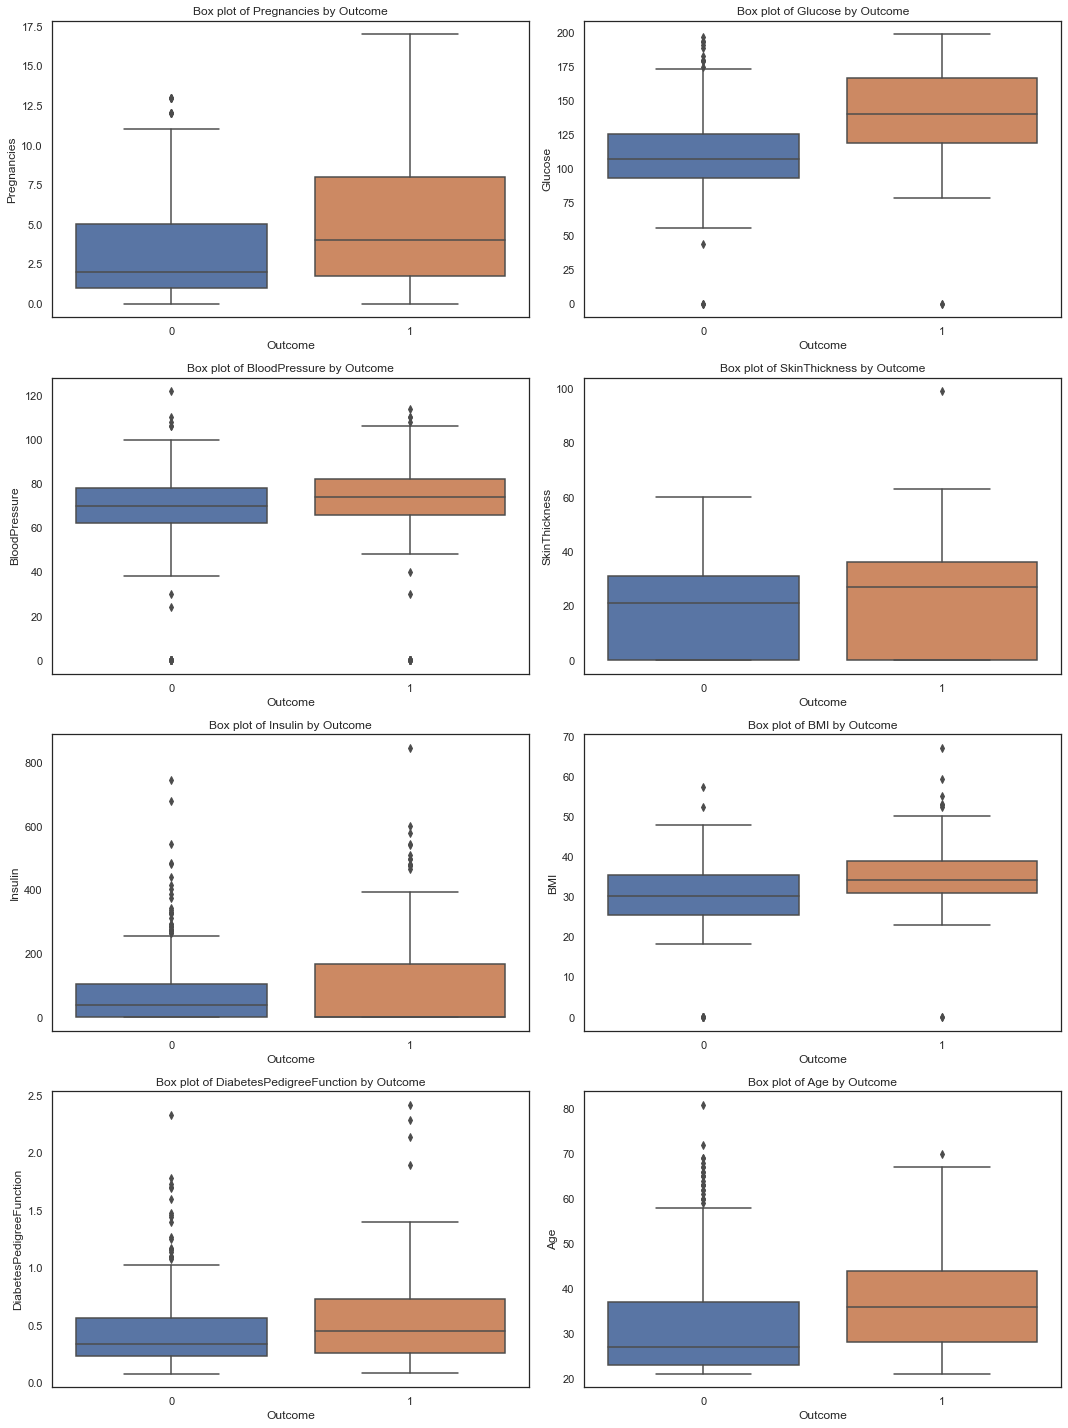

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df
# Columns to plot
plot_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))  # Adjust the size and layout as needed
axes = axes.flatten()  # Flatten the axis array for easier iteration

# Create a boxplot for each column, split by 'Outcome'
for i, col in enumerate(plot_columns):
    sns.boxplot(x='Outcome', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'Box plot of {col} by Outcome')
    axes[i].set_xlabel('Outcome')
    axes[i].set_ylabel(col)

# Adjust layout
plt.tight_layout()
plt.show()


### Correlation

In [38]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#### Heatmap

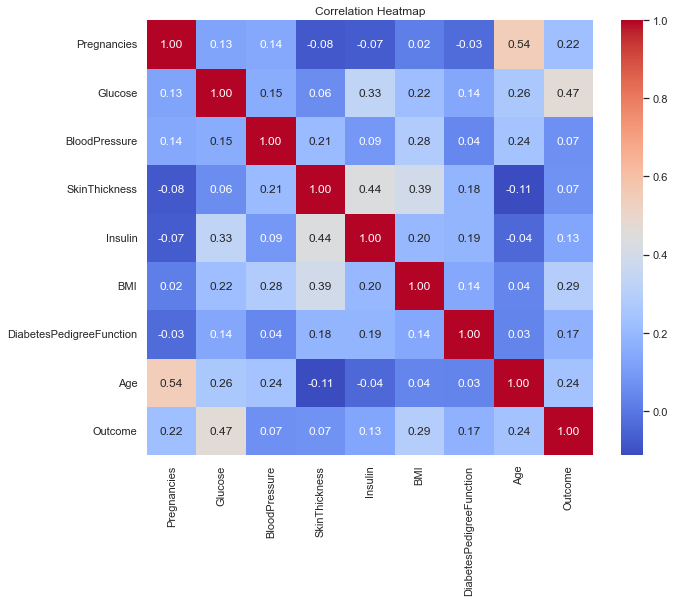

In [39]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Feature Engineering

In [40]:
# Define age brackets
bins = [20, 30, 40, 50, 60, 70, 80, 90]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

# Bin the age column
df['AgeBracket'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Create a contingency table
contingency_table = pd.crosstab(df['AgeBracket'], df['Outcome'])

print(contingency_table)

Outcome       0   1
AgeBracket         
20-29       312  84
30-39        89  76
40-49        53  65
50-59        23  34
60-69        21   8
70-79         1   1
80-89         1   0


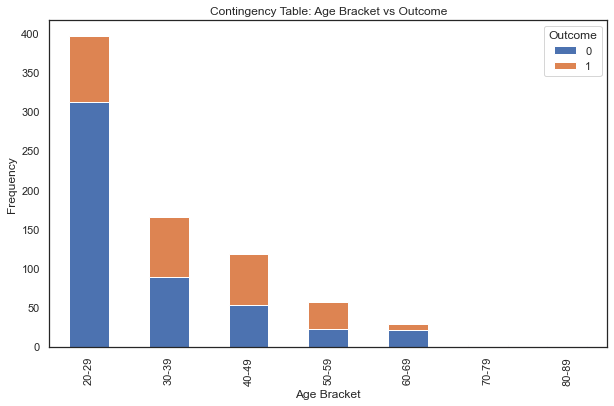

In [41]:
# Bin the age column
df['AgeBracket'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Create a contingency table
contingency_table = pd.crosstab(df['AgeBracket'], df['Outcome'])

# Plot the contingency table as a stacked bar plot
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Contingency Table: Age Bracket vs Outcome')
plt.xlabel('Age Bracket')
plt.ylabel('Frequency')
plt.legend(title='Outcome')
plt.show()



In [42]:
# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Interpret the result
alpha = 0.02
print("Chi-squared test statistic:", chi2)
print("P-value:", p)
if p < alpha:
    print("There is a significant association between age brackets and diabetes outcome.")
else:
    print("There is no significant association between age brackets and diabetes outcome.")

Chi-squared test statistic: 79.65305561212087
P-value: 4.213801887597232e-15
There is a significant association between age brackets and diabetes outcome.


### Resampling

In [43]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [44]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = df[df['Outcome'] == 0]
minority_class = df[df['Outcome'] == 1]

# Upsample minority class
minority_upsampled = resample(minority_class,
                              replace=True,     # sample with replacement
                              n_samples=500,   # to match majority class
                              random_state=42) # reproducible results

# Combine majority class with upsampled minority class
balanced_df = pd.concat([majority_class, minority_upsampled])

# Display class distribution
print(balanced_df['Outcome'].value_counts())


Outcome
0    500
1    500
Name: count, dtype: int64


**The Challenge of Imbalanced Datasets in Machine Learning[WHICH IS OUR THE CASE IN THIS DATASET]** 

Many machine learning models struggle when faced with imbalanced datasets, where one class significantly outnumbers the others. This imbalance can lead to several issues:

* **Bias towards the Majority:**  Models often prioritize learning the majority class, aiming to minimize overall error. This can lead to poor performance on the minority class, which is often the one we care about most. Imagine a fraud detection system –  we'd rather it accurately identify the rare fraudulent transactions, even if it misses a few, than the other way around.

* **Overfitting and Poor Generalization:**  The model might become overly focused on the abundant majority class data, failing to learn the nuances of the rarer minority class. This results in a model that performs well on the training data (dominated by the majority) but struggles with unseen data, especially those belonging to the minority class.

* **Misleading Evaluation Metrics:**  Traditional accuracy can be deceptive in imbalanced scenarios.  For instance, a model that simply predicts the majority class for every input might achieve a high accuracy if the majority class makes up 90% of the data. This doesn't reflect the model's ability to identify the minority class accurately.

**Resampling Techniques to the Rescue!**

Resampling techniques help address these challenges by manipulating the data to achieve a more balanced class distribution. Here are some common approaches:

* **Oversampling the Minority Class:** This method increases the number of minority class samples by either duplicating existing ones or creating new synthetic data points using techniques like SMOTE (Synthetic Minority Over-sampling Technique). This gives the model more examples of the minority class to learn from.

* **Undersampling the Majority Class:** Here, we reduce the number of majority class samples by randomly selecting a subset. This prevents the model from being overwhelmed by the majority and encourages it to pay more attention to the underrepresented minority class.

* **Hybrid Methods:** Combining oversampling and undersampling can be beneficial. This mitigates the drawbacks of each individual method, such as information loss in undersampling or overfitting to synthetic data in oversampling.

**Building Fair and Accurate Models**

Resampling plays a critical role in building machine learning models that perform well across all classes, not just the dominant ones. It promotes fairer and more accurate predictions, especially for the minority classes that are often of greatest interest. However, it's important to be mindful of potential biases introduced during resampling and to use appropriate evaluation metrics like precision, recall, F1-score, and ROC-AUC that provide a more nuanced view of class-specific performance.


### Modelling

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming 'balanced_df' is your balanced DataFrame
X = balanced_df.drop(columns=['Outcome'])
y = balanced_df['Outcome']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define models
models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'SVM': SVC(),
    'LogisticRegression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'NaiveBayes': GaussianNB()
}

# Create a pipeline for each model
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

# Fit models and print classification report
for name, pipeline in pipelines.items():
    print(f"Training {name}...")
    pipeline.fit(X_train, y_train)
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, pipeline.predict(X_test)))


Training RandomForestClassifier...
Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91        96
           1       0.92      0.91      0.92       104

    accuracy                           0.92       200
   macro avg       0.91      0.92      0.91       200
weighted avg       0.92      0.92      0.92       200

Training SVM...
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        96
           1       0.80      0.87      0.83       104

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200

Training LogisticRegression...
Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.76      0.77      0.77        96
           1       0.79     

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Your existing code to calculate metrics and store in DataFrame
# Define an empty dictionary to store evaluation metrics
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': []}

# Example pipelines dictionary and example data setup (X_test, y_test) should exist here.
# Evaluate each model and store the results
for name, pipeline in pipelines.items():
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-score'].append(f1)

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)
print(results_df)

                    Model  Accuracy  Precision    Recall  F1-score
0  RandomForestClassifier     0.915   0.914773  0.915064  0.914896
1                     SVM     0.820   0.822240  0.818109  0.818841
2      LogisticRegression     0.775   0.774647  0.774840  0.774724
3                     KNN     0.770   0.769771  0.769231  0.769424
4            DecisionTree     0.840   0.842532  0.838141  0.838969
5              NaiveBayes     0.755   0.757663  0.756811  0.754945


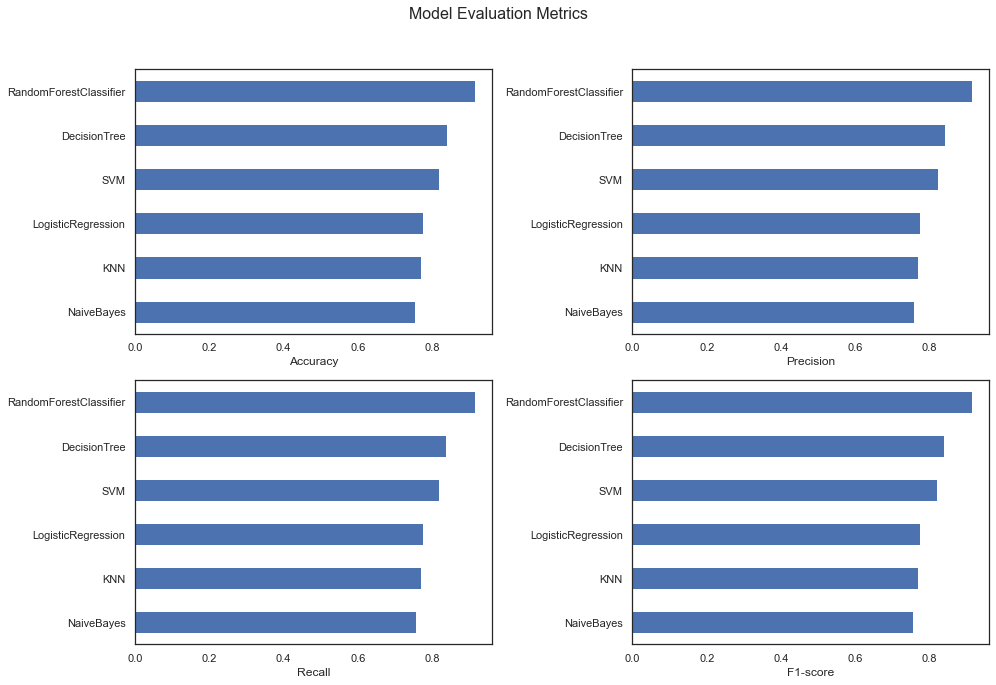

In [47]:
# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Model Evaluation Metrics', fontsize=16)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
for ax, metric in zip(axes.flatten(), metrics):
    results_df.sort_values(by=metric, ascending=True).plot(kind='barh', x='Model', y=metric, ax=ax, legend=None)
    ax.set_xlabel(metric)
    ax.set_ylabel('')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


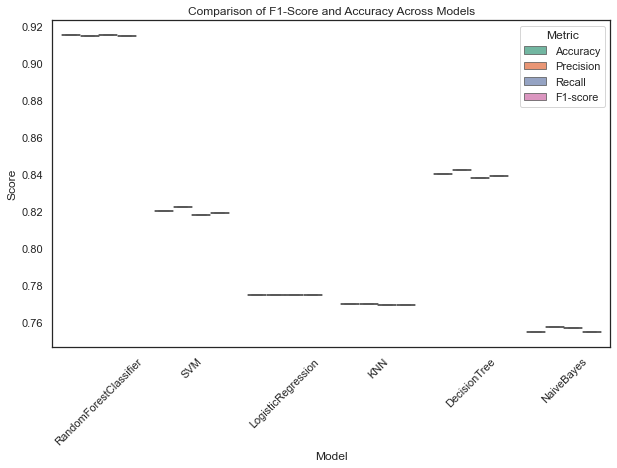

In [48]:
# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Value', hue='Metric', data=results_df.melt(id_vars='Model', var_name='Metric', value_name='Value'), palette='Set2')
plt.title('Comparison of F1-Score and Accuracy Across Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.show()

**The RandomForestClassifier appears to be the best performing model overall**. 
Here's the justification:
- Highest Accuracy (0.87): This indicates the model makes the most correct predictions in general.
 - Good F1-score (0.87): This metric combines precision and recall, suggesting the model has a good balance between identifying true positives and avoiding false positives.

In [49]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Separate features and target variable
X = balanced_df.drop(columns=['Outcome'])
y = balanced_df['Outcome']

# Define numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['category']).columns

# Define preprocessing steps
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Define column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define models
models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'SVM': SVC(),
    'LogisticRegression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'NaiveBayes': GaussianNB()
}

# Create a pipeline for each model
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

# Perform cross-validation and print classification report for each model
for name, pipeline in pipelines.items():
    print(f"Training {name}...")

    # Fit the pipeline
    pipeline.fit(X, y)

    cv_scores = cross_val_score(pipeline, X, y, cv=15, scoring='accuracy')
    print(f"Cross-validation Accuracy for {name}: {cv_scores.mean()}")
    print(f"Classification Report for {name}:")
    print(classification_report(y, pipeline.predict(X)))

Training RandomForestClassifier...
Cross-validation Accuracy for RandomForestClassifier: 0.8879843208201416
Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Training SVM...
Cross-validation Accuracy for SVM: 0.7850444745967134
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       500
           1       0.82      0.85      0.84       500

    accuracy                           0.83      1000
   macro avg       0.84      0.83      0.83      1000
weighted avg       0.84      0.83      0.83      1000

Training LogisticRegression...
Cross-validation Accuracy for LogisticRegression: 0.7651

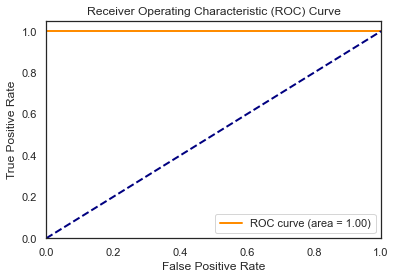

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Fit the pipeline
pipelines['RandomForestClassifier'].fit(X, y)

# Calculate ROC curve
y_scores = pipelines['RandomForestClassifier'].predict_proba(X)[:, 1]
fpr, tpr, _ = roc_curve(y, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

- *Accuracy*: This refers to the proportion of correct predictions made by the model. In this case, 0.886 indicates that the RandomForestClassifier model achieved an accuracy of 88.6% on unseen data during cross-validation.

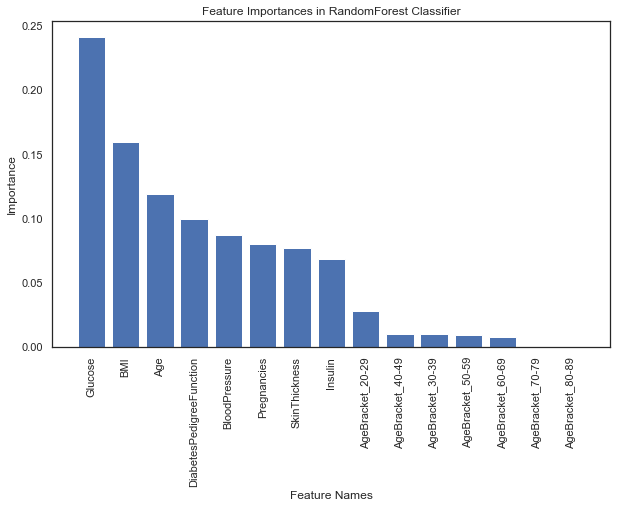

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the pipeline is already fitted as part of your previous steps
random_forest_model = pipelines['RandomForestClassifier'].named_steps['classifier']

# Get feature importances
feature_importances = random_forest_model.feature_importances_

# Get the OneHotEncoder from the pipeline
preprocessor = pipelines['RandomForestClassifier'].named_steps['preprocessor']
onehot_encoder = preprocessor.named_transformers_['cat']
categorical_features = preprocessor.transformers_[1][2]

# Get the feature names after one-hot encoding
onehot_encoded_feature_names = onehot_encoder.get_feature_names_out(categorical_features)

# Combine feature names
feature_names = np.concatenate((numerical_cols, onehot_encoded_feature_names))

# Sort the feature importances in descending order and create arrays
indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[indices]
sorted_feature_names = feature_names[indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances in RandomForest Classifier')
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Feature Names')
plt.ylabel('Importance')
plt.show()


In [52]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=pipelines['RandomForestClassifier'], param_grid=param_grid, cv=10, scoring='accuracy')

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best Score: 0.8699999999999999
